In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import import_ipynb
import Q1_helper as helper

%matplotlib inline

importing Jupyter notebook from Q1_helper.ipynb


In [2]:
def get_problem_grid_shape(h, xlim, zlim):
    
    """ get shape of spatial grid, given a step size h
    """
    x_pts = int(xlim[1]/h + 1)
    z_pts = int(zlim[1]/h + 1)
    
    return x_pts, z_pts

In [3]:
def get_velocity_field(boundary, v1, v2, h):
    
    """ boundary - function (spline) representing the boundary between the two layers
        h - step size
    """
    x_pts, z_pts = get_problem_grid_shape(h, xlim, zlim)
    
    v = np.ones((x_pts,z_pts))*v1
    
    for i in range(x_pts):
        z_val = int(boundary[i*h]/h)    # get the boundary z value for a given x
        v[:,i][z_val:] = v2
    
    return v

In [5]:
def plot_countours(func,xlim,zlim,h,title=None,cmap="bone"):
    
    """
    """
    x = np.arange(xlim[0],xlim[1]+1,h)
    z = np.arange(zlim[0],zlim[1]+1,h)
    xx, zz = np.meshgrid(x,z)

    fig, ax = plt.subplots(figsize=(16,9))
    ax.contourf(xx,zz,func,cmap=cmap)

    ax.set_xlim([0,6000])
    ax.set_ylim([6000,0])
    ax.xaxis.tick_top()
    
    fig.suptitle(title, fontsize=20)
    ax.set_xlabel("x", fontsize=16)
    ax.xaxis.set_label_position("top") 
    ax.set_ylabel("z", fontsize=16)
    
    im = ax.imshow(func,cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size="4%", pad=0.05)
    fig.colorbar(im, cax=cax)

    plt.show()
#     plt.savefig(f"{title}.png")

### Wave equation

In [6]:
def solve_2d_wave_equation(h, dt, v):
    
    """ h=dz=dx - spatial step size in both directions
        v - velocity field
    """    
    # coordinates of source
    source_x = int(3000/h)
    source_z = int(2800/h)
    tlim = (0,1)
    t_pts = int(tlim[1]/dt + 1)
    
    x_pts, z_pts = get_problem_grid_shape(h, xlim, zlim)
    
    F = np.zeros((x_pts,z_pts,t_pts))
    
    for k in range(t_pts-1):
        
        t = k*dt    # time elapsed from starting time
    
        for i in range(2,x_pts-2):
            for j in range(2,z_pts-2):
                c = v[i,j]    # velocity at point (i,j)
                
                if (c*dt)/h > 1:
                    print("Numerically unstable!!")
                    return
                
                # forth order schema for laplacian
                laplacian = ( 16*(F[i+1,j,k]+F[i-1,j,k]+F[i,j+1,k]+F[i,j-1,k]) - F[i+2,j,k]-F[i-2,j,k]-F[i,j+2,k]-F[i,j-2,k] - 60*F[i,j,k] ) / (12*h**2)
                F[i,j,k+1] = (c**2)*(dt**2)*laplacian +2*F[i,j,k] - F[i,j,k-1]
        
        if t <= 0.05:
            arg = 2*(np.pi)*t
            F[source_x,source_z,k+1] += t*np.exp(arg)*np.sin(arg)
    
    return F

In [7]:
# problem parameters
xlim=(0,6000)
zlim = (0,6000)
h = 100   # step size spatial
dt = 0.001    # step size temporal
v1 = 2000
v2 = 3000

In [8]:
boundary_points = [(0,2600),(1000,4000),(2600,3200),(4600,3600),(6000,2400)]
boundary = helper.calculate_cubic_spline(boundary_points, h)
v = get_velocity_field(boundary, v1, v2, h)

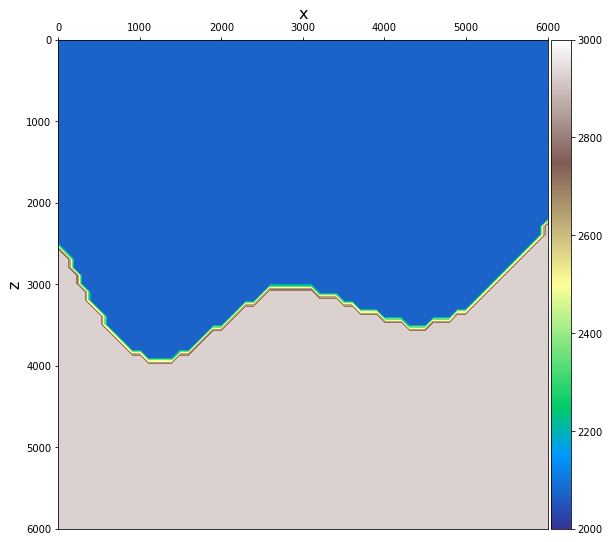

In [9]:
plot_countours(v, xlim, zlim, h,cmap="terrain")

In [10]:
%%time
F = solve_2d_wave_equation(h, dt, v)

Wall time: 24.7 s


In [19]:
# np.save('wave.npy', F)
# F1 = np.load('wave.npy')

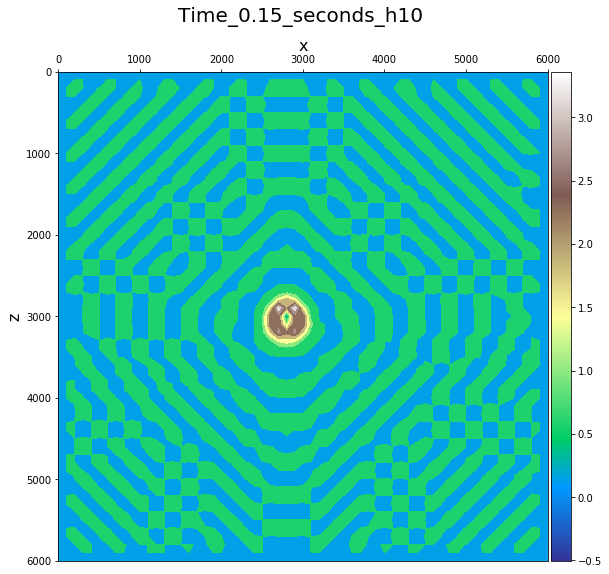

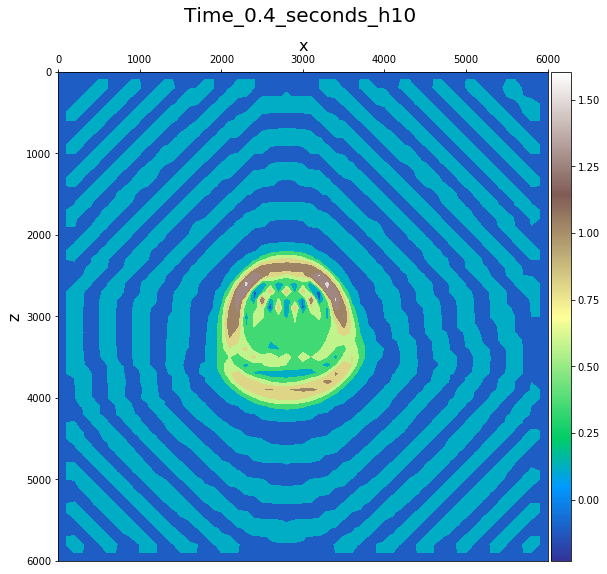

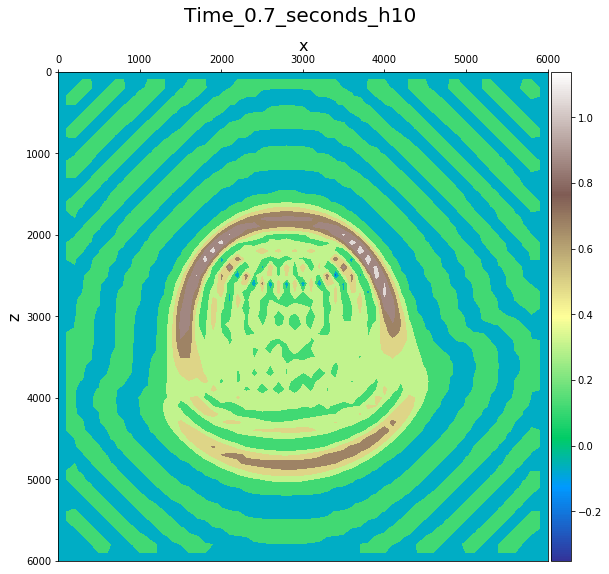

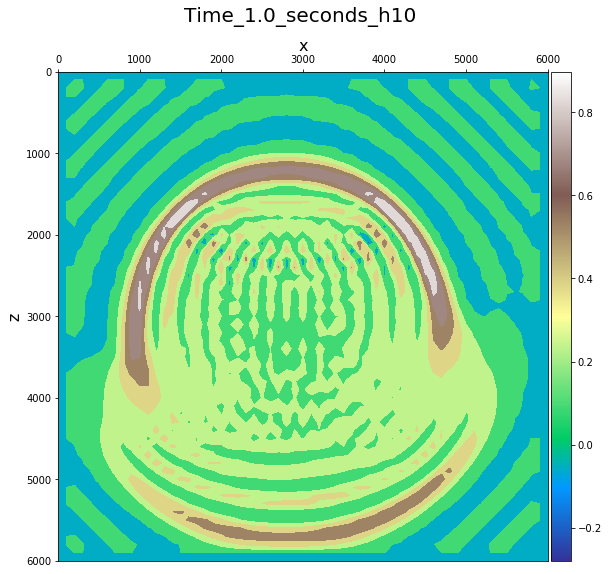

In [11]:
t = np.array([0.15,0.4,0.7,1])
for ti in t:
    t_index = int(ti/dt)
    plot_countours(F[:,:,t_index], xlim, zlim, h, title=f"Time_{ti}_seconds_h10", cmap="terrain")